# **Implementation of Histogram Equalization from Scratch**

**Task:** Write a function that performs global histogram equalization on a grayscale image (single-channel). The function must be implemented from scratch (no ready-made histogram-equalization helpers). The implementation should be correct, efficient, and well-documented.

1. Load Libraries and Image
2. Visualize Image and Histogram
    - Display the image
    - Show histograms (both OpenCV-style and Matplotlib-style)
3. Calculate Histogram Equalization From Scratch
    - Fundamentals about the image
    - Calculate Histogram
    - Calculate Cumulative Sum
    - Formula Computation
4. Histogram Equalization Visualization
    - Compare original vs. equalized image
    - Compare original vs. equalized histograms

# **1. Load Libraries and Image**

In [ ]:
!pip install opencv-python opencv-python-headless

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the image (replace 'image.jpg' with your uploaded filename)
img = cv2.imread('/content/Unequalized_Hawkes_Bay_NZ.jpg')

# **2. Visualize Image and Histogram (both OpenCV and Matplotlib Histograms)**

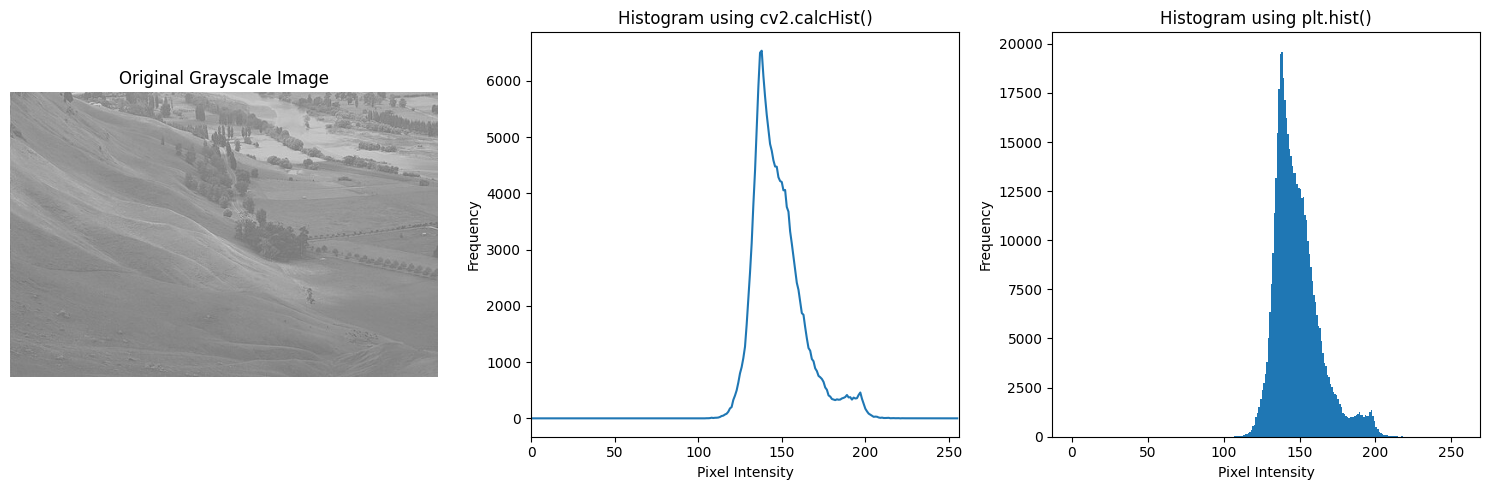

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')

plt.subplot(1, 3, 2)
hist_cv = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist_cv)
plt.title('Histogram using cv2.calcHist()')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0,256])
plt.grid(False)

plt.subplot(1, 3, 3)
plt.hist(img.ravel(), bins=256, range=(0,256))
plt.title('Histogram using plt.hist()')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(False)

plt.tight_layout()
plt.show()

# **3. Calculate Histogram Equalization From Scratch**
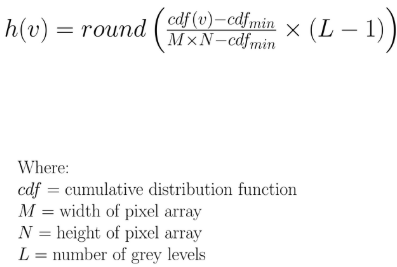

## **3.a. Fundamentals about the image**

In [ ]:
levels = 2 ** (img.itemsize * 8)
print("Bit depth:", img.itemsize * 8, "bits")
print("Possible intensity levels:", levels)

Bit depth: 8 bits
Possible intensity levels: 256


## **3.b. Calculate Histogram**

In [ ]:
hist = np.zeros(levels, dtype=int)
for pixel in img.ravel(): # The image should be flattened; otherwise, the histogram will not match the original histogram.
  # print(pixel)
  hist[pixel] += 1

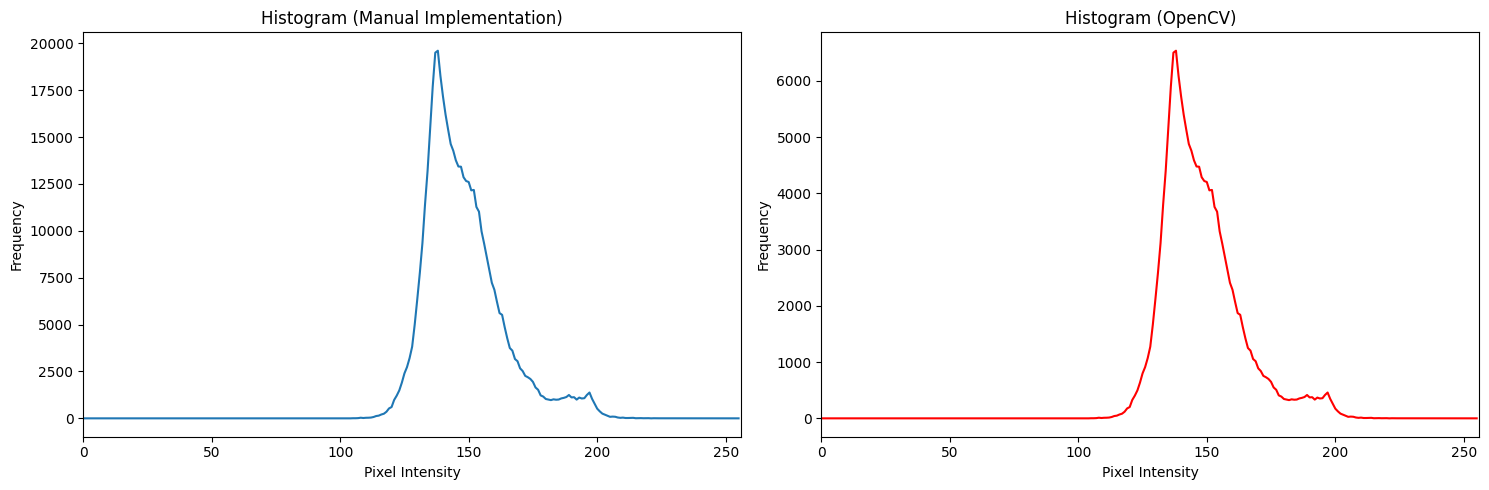

In [ ]:
# Compute OpenCV histogram (same grayscale image)
opencv_hist = cv2.calcHist([img], [0], None, [256], [0,256]).flatten()

# --- Display image and both histograms side by side ---
plt.figure(figsize=(15,5))

# Manual Histogram
plt.subplot(1,2,1)
plt.plot(hist)
plt.title('Histogram (Manual Implementation)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0,256])

# OpenCV Histogram
plt.subplot(1,2,2)
plt.plot(opencv_hist, color='red')
plt.title('Histogram (OpenCV)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0,256])

plt.tight_layout()
plt.show()

**⚠️ ⚠️ ⚠️ NOTE**

The OpenCV function cv2.**calcHist** and our histogram values are similar, but not an exact match.

In [ ]:
print("Equal:", np.array_equal(hist_cv, hist))

Equal: False


In [ ]:
hist

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     3,     0,     0,     0,     0,     6,     6,    12,
          33,    18,    30,    33,    42,    72,   123,   144,   204,
         246,   351,   528,   603,   981,  1212,  1491,  1905,  2397,
        2733,  3210,

In [ ]:
hist_cv.astype(int).flatten()

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,    0,    0,    0,    0,    2,    2,    4,   11,    6,
         10,   11,   14,   24,   41,   48,   68,   82,  117,  176,  201,
        327,  404,  497,  635,  799,  911, 1070, 1273, 1668, 2119, 2590,
       3115, 3796, 4398, 5159, 5894, 6500, 6535, 6088, 5721, 5400, 5132,
       4877, 4758, 4587, 4477, 4473, 4286, 4219, 42

## **3.c. Calculate Cumulative Sum**

In [ ]:
cumsum = np.zeros_like(hist)
total = 0
for i in range(len(hist)):
    total += hist[i]
    cumsum[i] = total

## **3.d. Formula Computation**

In [ ]:
# Number of pixels
num_pixels = cumsum[-1] # or HxW, img.size

# Find first non-zero cumsum value
cdf_min = cumsum[cumsum > 0][0]

# Create the mapping array
equalization_map_rounded = np.zeros_like(cumsum, dtype=np.uint8)
equalization_map = np.zeros_like(cumsum, dtype=np.float32)

for i in range(levels):
    equalization = (cumsum[i] - cdf_min) / (num_pixels - cdf_min) * (levels - 1)
    equalization_map_rounded[i] = round(equalization)
    equalization_map[i] = equalization


In [ ]:
df = pd.DataFrame({
    'Pixel Intensity': np.arange(len(hist)),
    'Frequency': hist,
    'CDF (v)': cumsum,
    'equalized ': equalization_map,
    'equalized (rounded value)': equalization_map_rounded
})

df[df['Frequency'] != 0] # Pixel values that have a zero count are excluded for the sake of brevity.

,Pixel Intensity,Frequency,CDF (v),equalized,equalized (rounded value)
100,100,3,3,0.000000,0
105,105,6,9,0.003063,0
106,106,6,15,0.006126,0
107,107,12,27,0.012252,0
108,108,33,60,0.029099,0
...,...,...,...,...,...
225,225,3,499488,254.993881,255
227,227,3,499491,254.995407,255
228,228,3,499494,254.996933,255
229,229,3,499497,254.998474,255


# **4. Histogram Equalization Visualization**

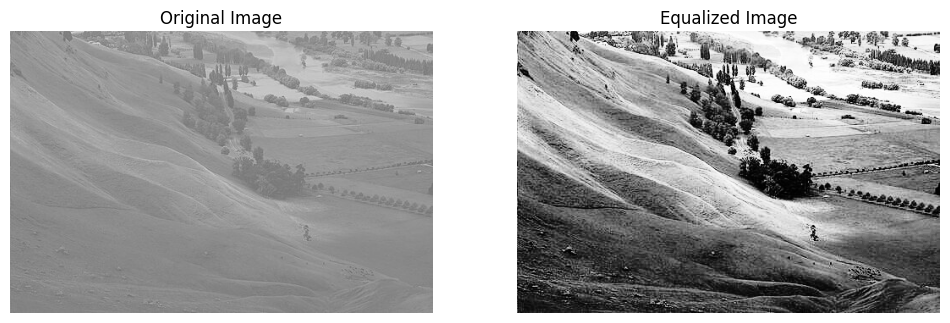

In [ ]:
#Compare original vs. equalized image

img_equalized = equalization_map_rounded[img]

plt.figure(figsize=(12,5))

# Original Image
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Equalized Image
plt.subplot(1,2,2)
plt.imshow(img_equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

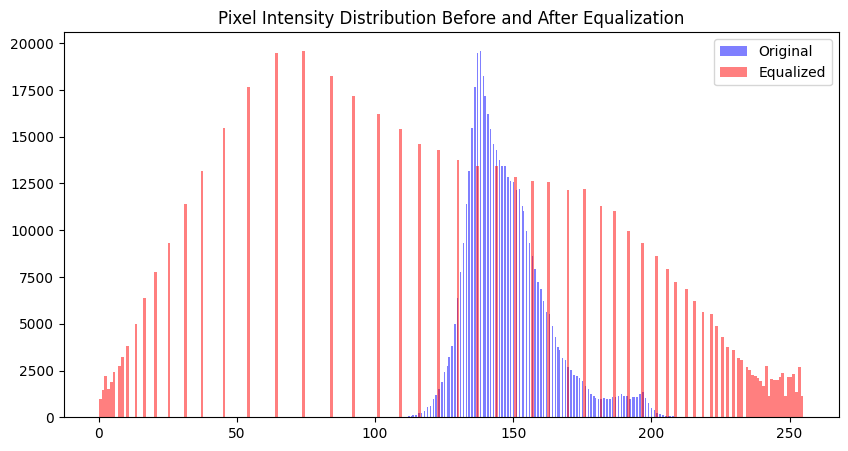

In [ ]:
# Compare original vs. equalized histograms

plt.figure(figsize=(10,5))
plt.hist(img.flatten(), bins=256, color='blue', alpha=0.5, label='Original')
plt.hist(img_equalized.flatten(), bins=256, color='red', alpha=0.5, label='Equalized')
plt.legend()
plt.title("Pixel Intensity Distribution Before and After Equalization")
plt.show()